## Get collected meta data

In [274]:
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import numpy as np

/Users/QiaoLiu1/anaconda3/envs/micro/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [19]:
kids_video_game = pd.read_csv('/Users/QiaoLiu1/kids_tube/video_details/video_details_kids_video_game.csv', 
                             index_col = 0)

In [146]:
import glob
import os

path = '/Users/QiaoLiu1/kids_tube/video_details'
all_files = glob.glob(path + "/*.csv")

all_dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    all_dfs.append(df)

frame = pd.concat(all_dfs, axis=0, ignore_index=True)
frame.columns = ['video', 'title', 'tags', 'description', 'category', 'caption']

###  Input stopword, word and 

In [138]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words
# stop_words = set(stopwords.words('english'))
stopword_set = set(stopwords.words('english'))
word_set = set(words.words())
### Add more stop words
for word in ['kid', 'children', 'children of']:
    stopword_set.add(word)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/QiaoLiu1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/QiaoLiu1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/QiaoLiu1/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Prepare matplotlib parameters

In [277]:
import matplotlib.pyplot as plt
# plt.switch_backend('Agg')
### set up plotting parameters
from matplotlib import rcParams
plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Palatino']
rcParams['figure.max_open_warning'] = 30
%matplotlib inline
import seaborn as sns

### Tools

In [42]:
### Clean up text
import re
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    # text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    # text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [46]:
def remove_stop(text):
    stemmer = PorterStemmer()
    try:
        text_tokens = word_tokenize(text)
        tokens_without_sw = [stemmer.stem(word) for word in text_tokens
                             if (word.lower().strip() not in stopword_set)]# and (word.lower().strip() in word_set)]
        return tokens_without_sw
    except:
        return ['']

In [25]:
def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]
                      ) for x in tokens if x.lower() not in stopword_set and len(x) > 8]
    return result

In [26]:
import pattern
from pattern.en import lemma, lexeme

## tags
1. clean text
2. lemma
3. get bigram for each setence
4. get trigram for each sentence

In [114]:
def clean_tags(tags, tokenize = True):
    ### deal with each tags
    res = []
    for tag in tags.split(','):
        cleaned_tag = clean_text(tag)
        lemma_tag = " ".join([lemma(wd) for wd in cleaned_tag.split()])
        lemma_tag = re.sub(r'\W+', ' ', lemma_tag)
        lemma_tag = re.sub('[^a-zA-Z ?!]+', '', lemma_tag)
        if tokenize:
            tokenized_tag = remove_stop(lemma_tag)
            bigrams_tag = get_bigrams(lemma_tag)
            res.extend(tokenized_tag)
            res.extend(bigrams_tag)
        else:
            res.append(lemma_tag)
    if tokenize: 
        return res
    else:
        return ','.join(res)

In [51]:
print(clean_tags(kids_video_game.iloc[0]['tags']))

cryy
cryyfuu
sky: children of the light
sky: children of the light gameplay
sky: children of the light first impressions
sky: children of the light ios
what is sky: children of the light?
is sky: children of the light good?
sky: children of the light review
sky: children of the light worth playing?
what is sky mobile game ios
let is play sky: children of the light
sky: children of the light commentary
games for anxiety
games for mental health
['cryy', 'cryyfuu', 'sky', 'light', 'sky children', 'the light', 'sky', 'light', 'gameplay', 'light gameplay', 'sky children', 'the light', 'sky', 'light', 'first', 'impress', 'impress', 'first impress', 'light first', 'sky children', 'the light', 'sky', 'light', 'sky children', 'the light', 'sky', 'light', 'sky children', 'the light', 'sky', 'light', 'good', 'light good', 'sky children', 'the light', 'sky', 'light', 'review', 'light review', 'sky children', 'the light', 'sky', 'light', 'worth', 'play', 'light worth', 'sky children', 'the light', 

### Description
1. remove '/n'
2. remove url
3. seperate to sentences
4. tokenize

In [43]:
def clean_text_pre(text):
    text = str(text).lower()
    text = re.sub(r'\n', " ", text)
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return text

In [53]:
def clean_description(description, tokenize = True):
    ### deal with each tags
    res = []
    cleaned_description = clean_text_pre(description)
    cleaned_description = clean_text(cleaned_description)
    lemma_description = " ".join([lemma(wd) for wd in cleaned_description.split()])
    lemma_description = re.sub(r'\W+', ' ', lemma_description)
    lemma_description = re.sub('[^a-zA-Z ?!]+', '', lemma_description)
    if tokenize:
        tokenized_description = remove_stop(lemma_description)
        bigrams_description = get_bigrams(lemma_description)
        res.extend(tokenized_description)
        res.extend(bigrams_description)
        return res
    else:
        return lemma_description

## Title
* clean up
* tokenize

In [54]:
def clean_title(title, tokenize = True):
    ### deal with each tags
    res = []
    cleaned_title = clean_text_pre(title)
    cleaned_title = clean_text(cleaned_title)
    lemma_title = " ".join([lemma(wd) for wd in cleaned_title.split()])
    lemma_title = re.sub(r'\W+', ' ', lemma_title)
    lemma_title = re.sub('[^a-zA-Z ?!]+', '', lemma_title)
    if tokenize:
        tokenized_title = remove_stop(lemma_title)
        bigrams_title = get_bigrams(lemma_title)
        res.extend(tokenized_title)
        res.extend(bigrams_title)
        return res
    else:
        return lemma_title

### Generate token

In [ ]:
kids_video_game['title_token'] = kids_video_game['title'].progress_apply(clean_title)
kids_video_game['description_token'] = kids_video_game['description'].progress_apply(clean_description)
kids_video_game['tags_token'] = kids_video_game['tags'].progress_apply(clean_description)

In [152]:
frame['title_token'] = frame['title'].progress_apply(clean_title)
frame['description_token'] = frame['description'].progress_apply(clean_description)
frame['tags_token'] = frame['tags'].progress_apply(clean_description)

In [154]:
frame['title_lemma'] = frame['title'].progress_apply(lambda x: clean_title(x, tokenize = False))
frame['description_lemma'] = frame['description'].progress_apply(lambda x: clean_description(x, tokenize = False))
frame['tags_lemma'] = frame['tags'].progress_apply(lambda x: clean_description(x, tokenize = False))

In [139]:
def get_tfidf(corpus):
    
    from sklearn.feature_extraction.text import TfidfVectorizer

    vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words=stopword_set, min_df = 5, max_df=0.1)
    vz = vectorizer.fit_transform(corpus)
    tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
    tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
    tfidf.columns = ['tfidf']
    return tfidf

In [155]:
len(set(frame['category']))

8

In [621]:
from wordcloud import WordCloud

def plot_word_cloud(df, category_col, text_col, saved_dir = None):
    
    categories = list(set(df[category_col]))
    n_row = len(categories) // 2
    plt.figure(figsize=(12,12))
    for row in range(n_row):
        for col in range(2):
            ax = plt.subplot(n_row, 2, row*2+col+1)
            category_df = df[df[category_col] == categories[row*2+col]]
            tfidf = get_tfidf(category_df[text_col])
            terms = tfidf.sort_values(by=['tfidf'], ascending=True)
            text = ['_'.join(x.split(' ')) for x in terms.index]
            text = ' '.join(text)
            # lower max_font_size
            wordcloud = WordCloud(max_font_size=40, background_color='white', max_words=20).generate(text)
            ax.imshow(wordcloud, interpolation="bilinear")
            plt.title(str(categories[row*2+col]).lower(), fontsize = 20)
            plt.axis("off")
    plt.tight_layout()
    if saved_dir is not None:
        plt.savefig(saved_dir)
    else:
        plt.show()

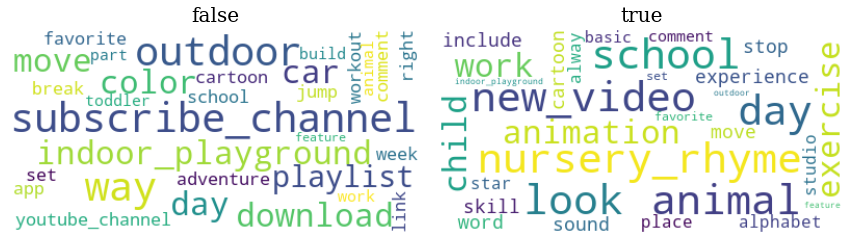

In [618]:
plot_word_cloud(frame, 'caption', 'description_lemma', './word_cloud_caption.pdf')

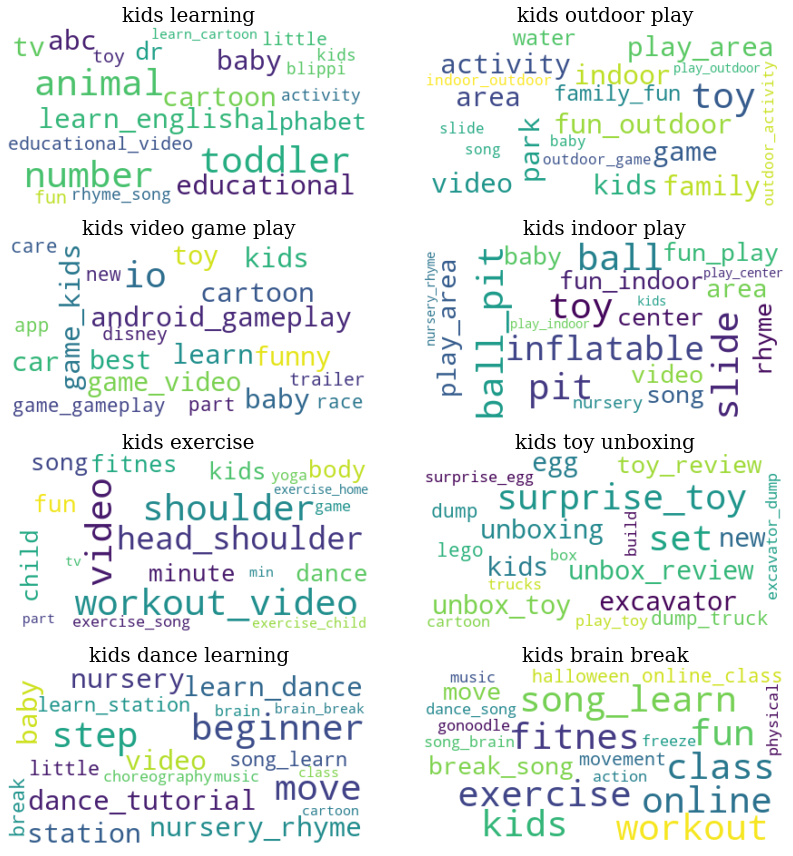

In [622]:
plot_word_cloud(frame, 'category', 'title_lemma', './word_cloud_category.pdf')

### Get the sentiment analysis curve for a transcript

In [328]:
def get_whole_transcripts(transcripts_ls):   
    transcripts = []
    for element_dict in transcripts_ls:
        transcripts.append(element_dict['text'])
    return ' '.join(transcripts)


In [536]:
def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    text = text.split(' ')
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(' '.join(text[start[piece]:start[piece]+size]))
    return split_list

In [507]:
from textblob import TextBlob

def get_text_polarity(text):
    polarity_curve = []
    for p in text:
        polarity_curve.append(TextBlob(p).sentiment.polarity)
    #polarity_curve.append(polarity_piece)
    average_polarity = np.mean(np.array(polarity_curve))
    var_polarity = np.var(np.array(polarity_curve))
    return polarity_curve, average_polarity, var_polarity

In [537]:
import glob
import os
import pickle
import seaborn as sns
import math

path = '/Users/QiaoLiu1/kids_tube/video_caption_pickle'
all_files = glob.glob(path + "/*.p")

polarities = []
polaritie_vars = []
polarity_curves = []
transcripts_texts = []
file_names = []

for filename in all_files:
    transcripts_ls = pickle.load(open(filename, 'rb'))
    whole_transcript = get_whole_transcripts(transcripts_ls)
    whole_transcript = clean_text(whole_transcript)
    if len(whole_transcript.split(' ')) <= 400:
        continue
    splited_text = split_text(whole_transcript)
    polarity_curve, new_polarity_mean, polaritie_var = get_text_polarity(splited_text)
    
    polarities.append(new_polarity_mean)
    polaritie_vars.append(polaritie_var)
    polarity_curves.append(polarity_curve)
    transcripts_texts.append(whole_transcript)
    file_names.append(filename)

In [575]:
def find_titles(df, filenames):
    
    res = []
    for file in filenames:
        video_id = file.rsplit('/',1)[1].split('.')[0]
        title = df.loc[df['video'] == video_id,'title']
        res.append(title.values[0])
    return res

In [623]:
def plot_time_series(polarity_curves, idx_ls, titles=None, save_dir = None):
    
    n_row = (len(idx_ls)+1) // 2
    plt.figure(figsize=(12,12))
    for row in range(n_row):
        for col in range(2):
            cur_i = row*2+col
            plt.subplot(n_row, 2, cur_i+1)
            cur_idx = idx_ls[cur_i]
            sns.lineplot(x = [*range(len(polarity_curves[cur_idx]))], y = polarity_curves[cur_idx])
            plt.xlabel('Times')
            plt.ylabel('Polarity')
            if titles is not None:
                plt.title(titles[cur_i][:30] + '...')
            if cur_i == len(idx_ls)-1:
                break
            
    plt.tight_layout()
    if save_dir is not None:
        plt.savefig(save_dir)
    else:
        plt.show()

In [615]:
def plot_neg_and_pos_polarity(frame, neg_idx, pos_idx, polarity_curves, save_dir = None):
    neg_titles = find_titles(frame, filenames=np.array(file_names)[neg_idx])
    pos_titles = find_titles(frame, filenames=np.array(file_names)[pos_idx])
    new_order_idx = []
    new_titles_ls = []
    for i in range(len(neg_idx)):
        new_order_idx.append(neg_idx[i])
        new_titles_ls.append(neg_titles[i])
        new_order_idx.append(pos_idx[i])
        new_titles_ls.append(pos_titles[i])
    
    plot_time_series(polarity_curves, new_order_idx, new_titles_ls, save_dir=save_dir)

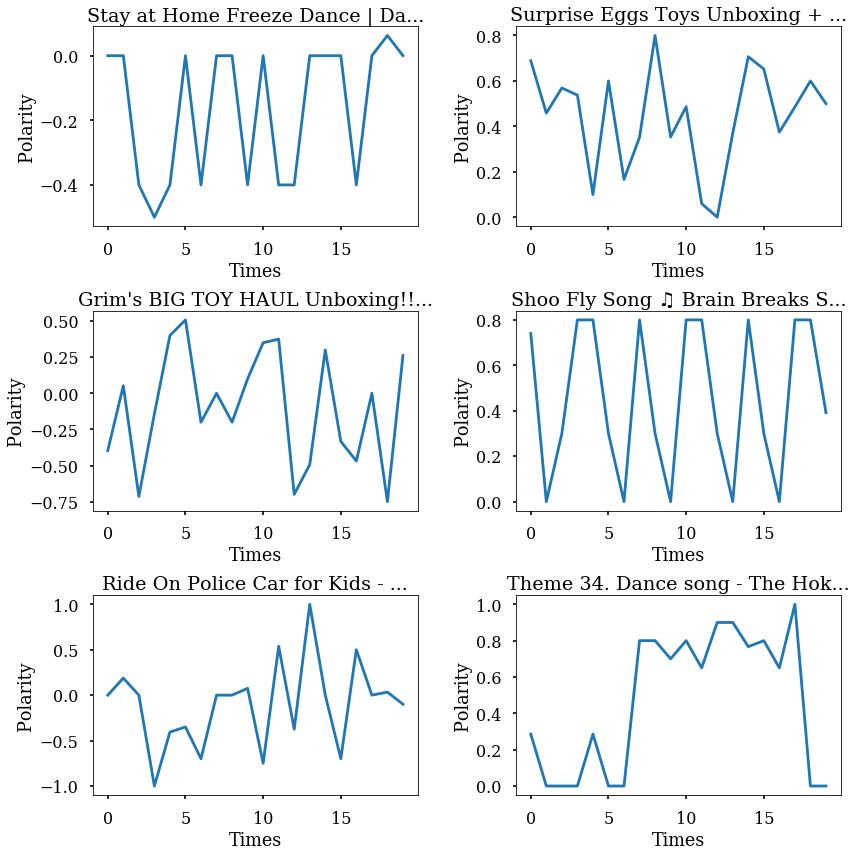

In [624]:
negative_idx = np.array(polarities).argsort()[:3]
positive_idx = np.array(polarities).argsort()[-3:]
plot_neg_and_pos_polarity(frame, negative_idx, positive_idx, polarity_curves, save_dir ='./sentimental_analysis.pdf')

Text(0, 0.5, 'Frequency')

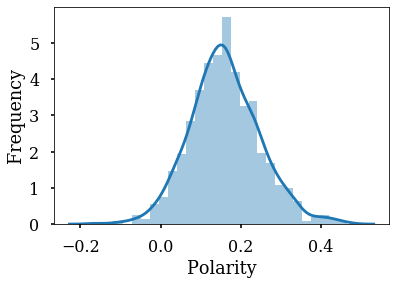

In [609]:
sns.distplot(np.array(polarities))
plt.xlabel('Polarity')
plt.ylabel('Frequency')